# ✨ 다중 로지스틱 회귀 실습 ✨

### 당뇨 데이터를 활용한 당뇨 예측

In [1]:
import tensorflow as tf
import numpy as np

In [20]:
Data_set = np.loadtxt("data-03-diabetes.csv", delimiter = ",")

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

x_data = Data_set[: , 0 : -1]
y_data = Data_set[: , [-1]]

X = tf.placeholder(tf.float64, shape = [None, 8])  # 개수가 정확하지 않을 때 : None 사용!
Y = tf.placeholder(tf.float64, shape = [None, 1])

# 기울기 a와 바이어스 b의 값을 임의로 정함
W = tf.Variable(tf.random_uniform([8, 1], dtype = tf.float64), name = 'Weight')
# [8, 1] 의미 : 들어오는 값은 8개, 나가는 값은 1개

b = tf.Variable(tf.random_uniform([1], dtype = tf.float64), name = 'bias')

# y 시그모이드 함수의 방정식을 세움
y = tf.sigmoid(tf.matmul(X, W) + b)

# 오차를 구하는 함수
cost = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y))

# 학습률 값
learning_rate = 0.01

# 오차를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# 💥🚫⛔우리가 만든 모델의 정밀도를 측정하기 위해!💥🚫⛔
predicted = tf.cast(y > 0.5, dtype = tf.float64)   ## 0.5 를 기준으로 0, 1을 반환해준다.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float64))  ## predicted 와 Y가 같은지, 다른지
# => reduce_mean : 배열의 평균 (predicted(예측값)와 Y(실제값)를 비교했을 때 결과의 평균 = 정확도)


# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(50001):
        W_, b_, cost_, _ = sess.run([W, b, cost, gradient_decent], feed_dict={X:x_data, Y:y_data})
        
        if (i + 1) % 5000 == 0:
            print("step = %d, W1 = %.4f, W2 = %.4f, W3 = %.4f, W4 = %.4f, W5 = %.4f, W6 = %.4f, W7 = %.4f, W8 = %.4f, b = %.4f, cost = %.4f" 
                 % (i + 1, W_[0], W_[1], W_[2], W_[3], W_[4], W_[5], W_[6], W_[7], b_, cost_))
    
    
    # 추가 코드
    #print("predicted = ", sess.run(predicted, feed_dict={X:x_data}))   # => y를 구하려면 X를 지정해줘야한다.

    # 다른 값 테스트
    #p_val, h_val = sess.run([predicted, y], feed_dict = {X:[[1, 5], [10, 5], [4, 5]]})
    #print("check predicted =", p_val)   # 연산된 값을 bool로 변환한 값
    #print("check hypothesis =", h_val)  # 계산값
    
    # 정확도 측정
    #h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    #print("\nHypothesis :", h, "\nCorrect (Y) :", c, "\nAccuracy :", a)        
    
    # 정확도 측정
    _, _, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nAccuracy :", a)   

step = 5000, W1 = -0.7133, W2 = -2.1019, W3 = 0.1283, W4 = -0.5249, W5 = -0.2082, W6 = -0.9658, W7 = -0.3619, W8 = 0.0189, b = 0.4189, cost = 0.4995
step = 10000, W1 = -0.8332, W2 = -2.8493, W3 = 0.0250, W4 = -0.6205, W5 = -0.2910, W6 = -1.4362, W7 = -0.6406, W8 = -0.0420, b = 0.3123, cost = 0.4800
step = 15000, W1 = -0.8625, W2 = -3.1866, W3 = 0.0331, W4 = -0.6444, W5 = -0.2972, W6 = -1.7349, W7 = -0.7983, W8 = -0.0409, b = 0.2743, cost = 0.4753
step = 20000, W1 = -0.8749, W2 = -3.3604, W3 = 0.0724, W4 = -0.6459, W5 = -0.2970, W6 = -1.9434, W7 = -0.8841, W8 = -0.0411, b = 0.2498, cost = 0.4736
step = 25000, W1 = -0.8820, W2 = -3.4553, W3 = 0.1204, W4 = -0.6383, W5 = -0.2991, W6 = -2.0968, W7 = -0.9307, W8 = -0.0464, b = 0.2301, cost = 0.4728
step = 30000, W1 = -0.8866, W2 = -3.5088, W3 = 0.1687, W4 = -0.6267, W5 = -0.3034, W6 = -2.2134, W7 = -0.9562, W8 = -0.0544, b = 0.2134, cost = 0.4724
step = 35000, W1 = -0.8898, W2 = -3.5395, W3 = 0.2138, W4 = -0.6138, W5 = -0.3089, W6 = -2.3042,

# ✨ 퍼셉트론 ✨
🐶 신경망을 이루는 가장 중요한 기본 단위

🐱 y = ax + b ( a는 기울기, b는 y 절편 ) 👉 y = Wx + b ( W는 가중치, b는 바이어스 )

🦊 가중합 : W1x1+ W2x2 + b      
🦊 활성화 함수  ex) 시그모이드

🐰 XOR (exclusive OR) 문제를 해결하지 못 함! ([1,1] : 0, [0,0] : 0, [1,0] : 1, [0,1] : 1)             

🤓 기존처럼 하나의 선이 아닌 두 개의 선을 그어 교집합을 찾자        
 x1 XOR x2 == NOT (x1 AND x2) AND (x1 OR x2) == (x1 NAND x2) AND (x1 OR x2)    

🧐 Hidden Layer(은닉층)에는 두 개의 직선을 만들기 위해 두 개의 뉴런이 필요 => 이 둘 교차시키는 연산 필요 => ⭐다중 퍼셉트론⭐

🐨오차 역전파는 경사 하강법의 확장 개념     
신경망 내부의 가중치는 오차 역전파를 이용하여 수정하여 얻음

### 1️⃣ single neural network AND 연산

In [23]:
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype = np.float32)
y_data = np.array([[0], [0], [0], [1]], dtype = np.float32)

X = tf.placeholder(tf.float32, [None, 2], name = 'x-input')
Y = tf.placeholder(tf.float32, [None, 1], name = 'y-input')

W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost / loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 예측값 결과 계산 및 정밀도 계산
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if step % 100 == 0:
            print("step =", step, "cost =", sess.run(cost, feed_dict={X:x_data, Y:y_data}),
                 "W =", sess.run(W), "b =", sess.run(b))
            
    # Accuracy
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis :", h, "\nCorrect :", c, "\nAccuracy :", a)

step = 0 cost = 0.70660204 W = [[2.4511883 ]
 [0.39721212]] b = [-0.8031659]
step = 100 cost = 0.3377292 W = [[1.8987201]
 [0.7005495]] b = [-2.2825046]
step = 200 cost = 0.2782881 W = [[2.015758 ]
 [1.2689223]] b = [-2.786027]
step = 300 cost = 0.23981419 W = [[2.1807175]
 [1.7022659]] b = [-3.1967237]
step = 400 cost = 0.21204533 W = [[2.3562264]
 [2.0417883]] b = [-3.5589411]
step = 500 cost = 0.19060236 W = [[2.5321186]
 [2.3203743]] b = [-3.8840754]
step = 600 cost = 0.17331824 W = [[2.7033732]
 [2.5575235]] b = [-4.1793666]
step = 700 cost = 0.1589841 W = [[2.8676171]
 [2.7650511]] b = [-4.4500313]
step = 800 cost = 0.14685471 W = [[3.023933 ]
 [2.9504292]] b = [-4.699982]
step = 900 cost = 0.1364345 W = [[3.1721797]
 [3.1185846]] b = [-4.9322295]
step = 1000 cost = 0.127375 W = [[3.312608 ]
 [3.2729087]] b = [-5.14915]
step = 1100 cost = 0.119420886 W = [[3.4456546]
 [3.4158213]] b = [-5.3526554]
step = 1200 cost = 0.11237925 W = [[3.5718274]
 [3.5491076]] b = [-5.5443096]
step 

### 2️⃣ single neural network NAND 연산

In [26]:
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype = np.float32)
y_data = np.array([[1], [1], [1], [0]], dtype = np.float32)

X = tf.placeholder(tf.float32, [None, 2], name = 'x-input')
Y = tf.placeholder(tf.float32, [None, 1], name = 'y-input')

W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost / loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 예측값 결과 계산 및 정밀도 계산
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if step % 100 == 0:
            print("step =", step, "cost =", sess.run(cost, feed_dict={X:x_data, Y:y_data}),
                 "W =", sess.run(W), "b =", sess.run(b))
            
    # Accuracy
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis :", h, "\nCorrect :", c, "\nAccuracy :", a)

step = 0 cost = 0.68160236 W = [[ 1.0457289]
 [-0.6151815]] b = [1.6071373]
step = 100 cost = 0.41311142 W = [[-0.2684953]
 [-1.3226477]] b = [1.7036629]
step = 200 cost = 0.3289925 W = [[-0.94491595]
 [-1.5826888 ]] b = [2.2606018]
step = 300 cost = 0.27684397 W = [[-1.4247683]
 [-1.8200564]] b = [2.7436142]
step = 400 cost = 0.2405568 W = [[-1.7951871]
 [-2.0471635]] b = [3.1601415]
step = 500 cost = 0.21336022 W = [[-2.096842 ]
 [-2.2618775]] b = [3.5270488]
step = 600 cost = 0.19196668 W = [[-2.3523986]
 [-2.4632437]] b = [3.8556275]
step = 700 cost = 0.17457573 W = [[-2.5752487]
 [-2.6514344]] b = [4.153577]
step = 800 cost = 0.16010071 W = [[-2.7737365]
 [-2.8272102]] b = [4.426387]
step = 900 cost = 0.14783579 W = [[-2.9533134]
 [-2.9915717]] b = [4.6781197]
step = 1000 cost = 0.13729614 W = [[-3.1177135]
 [-3.145565 ]] b = [4.911886]
step = 1100 cost = 0.12813455 W = [[-3.2695944]
 [-3.2901967]] b = [5.1301184]
step = 1200 cost = 0.12009388 W = [[-3.4109237]
 [-3.426386 ]] b = 

### 3️⃣ single neural network OR 연산

In [27]:
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [1]], dtype = np.float32)

X = tf.placeholder(tf.float32, [None, 2], name = 'x-input')
Y = tf.placeholder(tf.float32, [None, 1], name = 'y-input')

W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost / loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 예측값 결과 계산 및 정밀도 계산
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if step % 100 == 0:
            print("step =", step, "cost =", sess.run(cost, feed_dict={X:x_data, Y:y_data}),
                 "W =", sess.run(W), "b =", sess.run(b))
            
    # Accuracy
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis :", h, "\nCorrect :", c, "\nAccuracy :", a)

step = 0 cost = 0.9201837 W = [[-0.5642119]
 [ 0.7443477]] b = [-0.76706487]
step = 100 cost = 0.3114297 W = [[0.95614994]
 [1.7542955 ]] b = [0.08526676]
step = 200 cost = 0.24459726 W = [[1.6062078]
 [2.1677344]] b = [-0.1765819]
step = 300 cost = 0.20122166 W = [[2.097698]
 [2.50998 ]] b = [-0.4489475]
step = 400 cost = 0.1703693 W = [[2.502319]
 [2.813876]] b = [-0.67706275]
step = 500 cost = 0.14736432 W = [[2.8464632]
 [3.087842 ]] b = [-0.86770064]
step = 600 cost = 0.12958482 W = [[3.1453795]
 [3.336548 ]] b = [-1.03041]
step = 700 cost = 0.11545509 W = [[3.4092102]
 [3.5635688]] b = [-1.1721374]
step = 800 cost = 0.10397346 W = [[3.645096 ]
 [3.7718577]] b = [-1.2976443]
step = 900 cost = 0.09447248 W = [[3.8582392]
 [3.9638906]] b = [-1.4102535]
step = 1000 cost = 0.08649027 W = [[4.052537 ]
 [4.1417418]] b = [-1.5123588]
step = 1100 cost = 0.07969707 W = [[4.230974]
 [4.307163]] b = [-1.6057395]
step = 1200 cost = 0.0738512 W = [[4.395892]
 [4.461624]] b = [-1.6917537]
step 

### 4️⃣ single neural network XOR 연산 💥

In [28]:
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

X = tf.placeholder(tf.float32, [None, 2], name = 'x-input')
Y = tf.placeholder(tf.float32, [None, 1], name = 'y-input')

W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost / loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 예측값 결과 계산 및 정밀도 계산
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if step % 100 == 0:
            print("step =", step, "cost =", sess.run(cost, feed_dict={X:x_data, Y:y_data}),
                 "W =", sess.run(W), "b =", sess.run(b))
            
    # Accuracy
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis :", h, "\nCorrect :", c, "\nAccuracy :", a)

step = 0 cost = 1.147689 W = [[0.54303825]
 [0.22509597]] b = [1.6586293]
step = 100 cost = 0.6977366 W = [[-0.13235211]
 [-0.31579468]] b = [0.31076336]
step = 200 cost = 0.69505054 W = [[-0.1127404 ]
 [-0.21080059]] b = [0.19272244]
step = 300 cost = 0.69399035 W = [[-0.08325413]
 [-0.13564825]] b = [0.12985343]
step = 400 cost = 0.69352436 W = [[-0.05990801]
 [-0.08789951]] b = [0.08766488]
step = 500 cost = 0.693317 W = [[-0.04241316]
 [-0.05736698]] b = [0.05917792]
step = 600 cost = 0.69322395 W = [[-0.02968203]
 [-0.03767065]] b = [0.03994525]
step = 700 cost = 0.693182 W = [[-0.02059721]
 [-0.02486487]] b = [0.02696234]
step = 800 cost = 0.693163 W = [[-0.01420295]
 [-0.01648277]] b = [0.01819881]
step = 900 cost = 0.69315445 W = [[-0.00974699]
 [-0.0109649 ]] b = [0.01228362]
step = 1000 cost = 0.69315046 W = [[-0.0066646 ]
 [-0.00731522]] b = [0.00829102]
step = 1100 cost = 0.6931487 W = [[-0.00454415]
 [-0.00489172]] b = [0.00559614]
step = 1200 cost = 0.69314784 W = [[-0.00

\hypothesis : [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct : [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy : 0.5


### 4️⃣ single neural network XOR 연산  => 해결!!

In [29]:
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
    
# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0,0), (1,0), (0,1), (1,1)]:
        y = XOR(x[0], x[1])
        print("입력 값 :" + str(x) + "출력 값 :" + str(y))

입력 값 :(0, 0)출력 값 :0
입력 값 :(1, 0)출력 값 :1
입력 값 :(0, 1)출력 값 :1
입력 값 :(1, 1)출력 값 :0


In [30]:
# 가중치와 바이어스
w11 = np.array([-7.40, -7.40])
w12 = np.array([8.67, 8.67])
w2 = np.array([7.41, 7.41])
b1 = 11.28
b2 = -3.87
b3 = -11.29

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
    
# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0,0), (1,0), (0,1), (1,1)]:
        y = XOR(x[0], x[1])
        print("입력 값 :" + str(x) + "출력 값 :" + str(y))

입력 값 :(0, 0)출력 값 :0
입력 값 :(1, 0)출력 값 :1
입력 값 :(0, 1)출력 값 :1
입력 값 :(1, 1)출력 값 :0


In [32]:
learning_rate = 0.1
np.random.seed(0)
tf.set_random_seed(0)

x_data = np.array([[0,0], [0,1], [1,0], [1,1]])
y_data = np.array([[0], [1], [1], [0]])

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)


cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if step % 100 == 0:
            print("step =", step, "cost =", sess.run(cost, feed_dict={X:x_data, Y:y_data}),
                 "W2 =", sess.run(W2))
            
    # Accuracy
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis : \n", h, "\nCorrect : \n", c, "\nAccuracy : \n", a)

step = 0 cost = 0.7127425 W2 = [[-1.0439962 ]
 [-0.35504904]]
step = 100 cost = 0.6919861 W2 = [[-0.9733313 ]
 [-0.27967462]]
step = 200 cost = 0.69140023 W2 = [[-0.9719322 ]
 [-0.30612385]]
step = 300 cost = 0.69072264 W2 = [[-0.9758814 ]
 [-0.34338722]]
step = 400 cost = 0.6898404 W2 = [[-0.9823105 ]
 [-0.38849455]]
step = 500 cost = 0.68866503 W2 = [[-0.9914159 ]
 [-0.44299483]]
step = 600 cost = 0.6870754 W2 = [[-1.003686  ]
 [-0.50899225]]
step = 700 cost = 0.6849079 W2 = [[-1.0197763 ]
 [-0.58894217]]
step = 800 cost = 0.681951 W2 = [[-1.040517  ]
 [-0.68554235]]
step = 900 cost = 0.6779443 W2 = [[-1.0669235]
 [-0.8015172]]
step = 1000 cost = 0.67258817 W2 = [[-1.1001972 ]
 [-0.93929684]]
step = 1100 cost = 0.66555375 W2 = [[-1.1417398]
 [-1.1006715]]
step = 1200 cost = 0.6564859 W2 = [[-1.1932102]
 [-1.2865418]]
step = 1300 cost = 0.64499897 W2 = [[-1.2566508]
 [-1.4968084]]
step = 1400 cost = 0.63068587 W2 = [[-1.3346751]
 [-1.7303244]]
step = 1500 cost = 0.6131715 W2 = [[-1.43

In [34]:
!pip install pandas

In [35]:
import pandas as pd

In [36]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],    # numpy는 np.array
             index = ['서울', '부산', '인천', '대구'])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [37]:
s.ndim

1

In [38]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [40]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [41]:
type(s.index)

pandas.core.indexes.base.Index

In [42]:
type(s.values)

numpy.ndarray

In [43]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [45]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [46]:
s[1], s['부산']

(3448737, 3448737)

In [47]:
s[2], s['인천']

(2890451, 2890451)

In [48]:
s[[0, 3, 1]]  # numpy 1차원 array(vector)와 동일함

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [51]:
s[0]

9904312

In [52]:
s[(250e4 < s) & (s < 500e4)]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [53]:
s[1:3]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [54]:
s["부산":"대구"]   ## 문자로 인덱싱할 때는 마지막 인덱스도 포함!

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [55]:
s0 = pd.Series(range(3), index = ["a", "b", "c"])
s0

a    0
b    1
c    2
dtype: int64

In [56]:
s0.a

0

In [57]:
s0["a"]

0

## 시각화

In [64]:
!pip install matplotlib

In [77]:
import matplotlib as mpl

In [69]:
import matplotlib.pyplot as plt

In [75]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths= None, fontext = "ttf")

font_list[:]

['C:\\Windows\\Fonts\\HMKBP.TTF',
 'C:\\Windows\\Fonts\\LEELAWDB.TTF',
 'C:\\Windows\\Fonts\\HMFMPYUN.TTF',
 'C:\\Windows\\Fonts\\MEIRYOB.TTC',
 'C:\\Windows\\Fonts\\PERB____.TTF',
 'C:\\Windows\\Fonts\\palabi.ttf',
 'C:\\Windows\\Fonts\\JOKERMAN.TTF',
 'C:\\Windows\\Fonts\\GOUDOS.TTF',
 'C:\\Windows\\Fonts\\ENOCRA.TTF',
 'C:\\Windows\\Fonts\\GARABD.TTF',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\HMKBS.TTF',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\BAUHS93.TTF',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Windows\\Fonts\\ENGDOS.TTF',
 'C:\\Windows\\Fonts\\msjh.ttc',
 'C:\\Windows\\Fonts\\YGGE05.TTF',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\HYNAML.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\ahn_l.ttf',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\Windows\\Fonts\\CENTURY.TTF',
 'C:\\Windows\\Fonts\\FRADMIT.TTF',
 'C:\\Windows\\Fonts\\ENMUHB.TTF',
 'C:\\Windows\\Fonts\\YSHN05.TTF',
 'C

In [79]:
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'? ??',
 '???',
 '????',
 '??????',
 'Agency FB',
 'Algerian',
 'AmeriGarmnd BT',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Bahnschrift',
 'Baskerville BT',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'BernhardFashion BT',
 'Blackadder ITC',
 'Blippo Blk BT',
 'Bodoni Bd BT',
 'Bodoni Bk BT',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'BroadwayEngraved BT',
 'Brush Script MT',
 'BrushScript BT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'CentSchbook BT',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'CommercialScript BT',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Cooper Blk BT',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Courier10 B

In [80]:
# 폰트 설정
mpl.rc("font", family = 'NanumGothic')

# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus = False)

In [70]:
%matplotlib inline

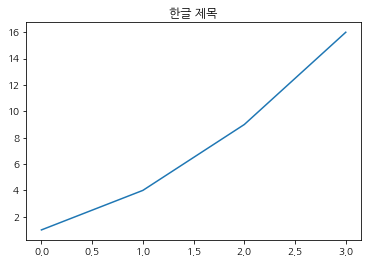

In [81]:
plt.title('한글 제목')
plt.plot([1, 4, 9, 16])
plt.show()

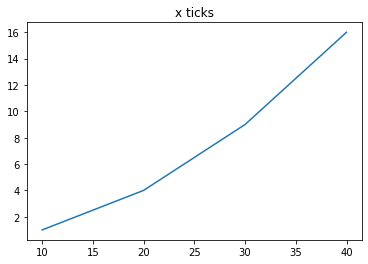

In [72]:
plt.title('x ticks')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

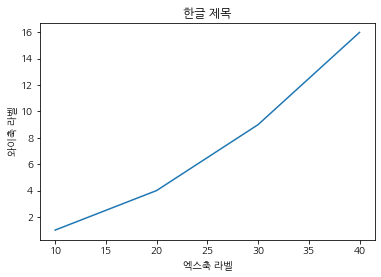

In [84]:
plt.title("한글 제목")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.xlabel('엑스축 라벨')
plt.ylabel('와이축 라벨')
plt.show()

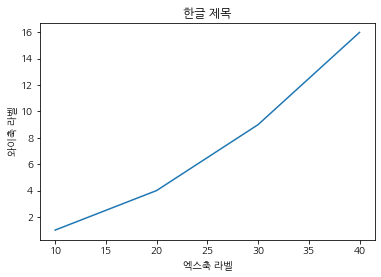

In [84]:
plt.title("한글 제목", fontdict = font1)
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.xlabel('엑스축 라벨', fontdict = font2)
plt.ylabel('와이축 라벨', fontdict = font3)
plt.show()

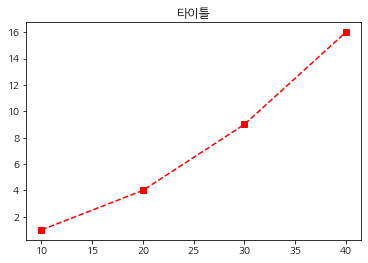

In [85]:
plt.title("타이틀")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'rs--')
plt.show()